<a href="https://colab.research.google.com/github/jumbokh/Intelligent-monitoring-class/blob/main/notebooks/Yolov3_using_Darknet_on_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 如何在 Colab 安裝 Darknet 框架訓練 YOLO v3 物件辨識並且最佳化 Colab 的訓練流程

此範例程式碼為文章「如何在 Colab 安裝 Darknet 框架訓練 YOLO v3 物件辨識並且最佳化 Colab 的訓練流程」的範例程式碼。

這篇文章會教你：
* 利用 Colab 128G RAM GPU 來訓練你的 Yolo3 模型
* 將 Colab 設定成可以運用在實際專案的訓練環境
* 快速掛載本機電腦上的檔案到 Colab 環境中
* 事先編譯所有需要的檔案，每次開啟 Colab 後即可立刻進行訓練
* 將訓練好的 weight 檔案自動同步回本機電腦，避免檔案遺失

## Step 2：連接你的 Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') # 請點擊網址，選擇 Google 帳號登入，然後將授權碼貼回輸入框中



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ln -fs /content/gdrive/My\ Drive /app

## 步驟 4：下載並編譯 Darknet（只需要執行一次）

這個步驟只需要執行一次，執行過程我們會把執行檔複製到 Google Drive。之後要跑程式時，只要把執行檔複製回 Colab 環境就可以使用了。

### 4.1 下載 cuDNN 檔案

1. 申請 Nvidia 帳號，申請網址為 http://bit.ly/2qfpOPj
2. 下載 `cudnn-10.0-linux-x64-v7.5.0.56.tgz`，下載網址為 
下載 cuDNN 檔案。下載網址為：http://bit.ly/2qfpOPj
3. 將下載的檔案 `cudnn-10.0-linux-x64-v7.5.0.56.tgz` 放到 google drive 的 `darknet/cuDNN/` 目錄下。

In [ ]:
!tar -xzvf /app/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# 檢查是否安裝成功
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


### 4.2 下載並編譯 Darknet

In [ ]:
%cd /content/ 
!git clone https://github.com/kriyeng/darknet/ darknet_source
%cd darknet_source

# 修改 Darknet 設定，符合 Colab 環境
!sed -i "s/GPU=0/GPU=1/g" Makefile
!sed -i "s/CUDNN=0/CUDNN=1/g" Makefile
!sed -i "s/OPENCV=0/OPENCV=1/g" Makefile

# 編譯
!make 

# 將編譯完成的執行檔複製回 Google Drive
!cp ./darknet /app/darknet 
!cp ./darknet /content/darknet
%cd /content

/content
Cloning into 'darknet_source'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 9.98 MiB | 5.47 MiB/s, done.
Resolving deltas: 100% (6762/6762), done.
/content/darknet_source
mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(mat_cv*, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:896:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config

# 測試 Darknet 是否正常安裝

我們用 yolo 官方預先訓練好的模型來偵測範例圖片。

In [ ]:
%cd /content/darknet_source
!wget https://pjreddie.com/media/files/yolov3.weights
!/content/darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show



/content/darknet_source
--2019-11-05 08:34:26--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  20.7MB/s    in 12s     

2019-11-05 08:34:39 (19.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6

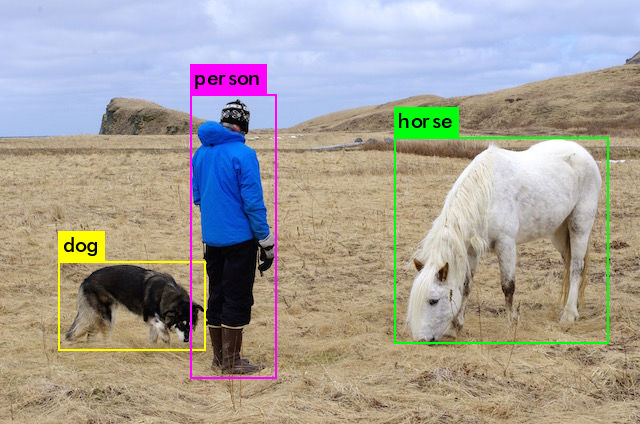

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('predictions.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)